In [1]:
import numpy as np
import cft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import collections
from scipy.spatial import ConvexHull

from adhesion import get_convex_hull, plot_regular_triangulation, plot_power_diagram

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['lines.solid_capstyle'] = 'round'

def plot_image(box, data, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.imshow(data, extent=[-box.L/2, box.L/2, -box.L/2, box.L/2], interpolation='nearest', cmap='RdYlBu')
    plt.show()

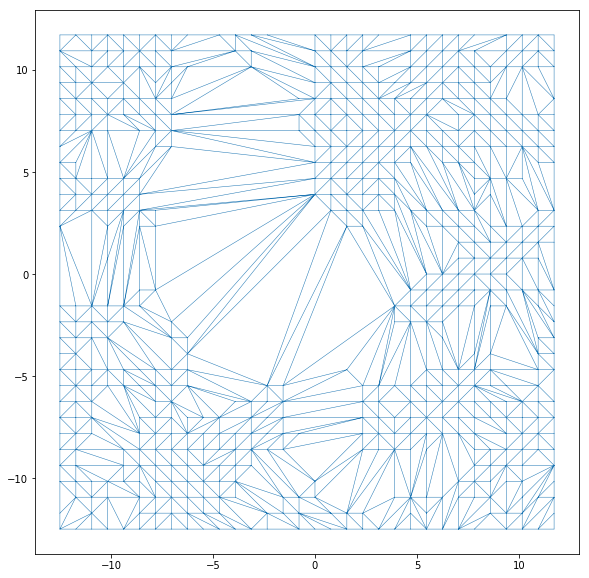

In [3]:
box = cft.Box(dim=2, N=32, L=25.)
P = cft.Power_law(n=-0.75) * cft.Scale(box, 0.5)
delta_0 = cft.garfield(B=box, P=P, seed=44)
delta_0 /= delta_0.std()
pot_0 = np.fft.ifftn(np.fft.fftn(delta_0) * cft.Potential()(box.K)).real

ch, selection, valid = get_convex_hull(box, pot_0, 2.0)

xlim = None
ylim = None

plot_regular_triangulation(ch, selection, xlim, ylim)
plt.show()

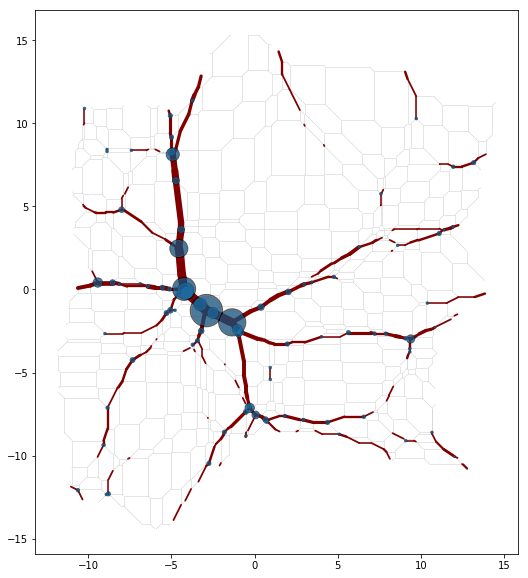

In [5]:
plot_power_diagram(box, ch, valid, xlim, ylim, point_scale=10)
plt.show()

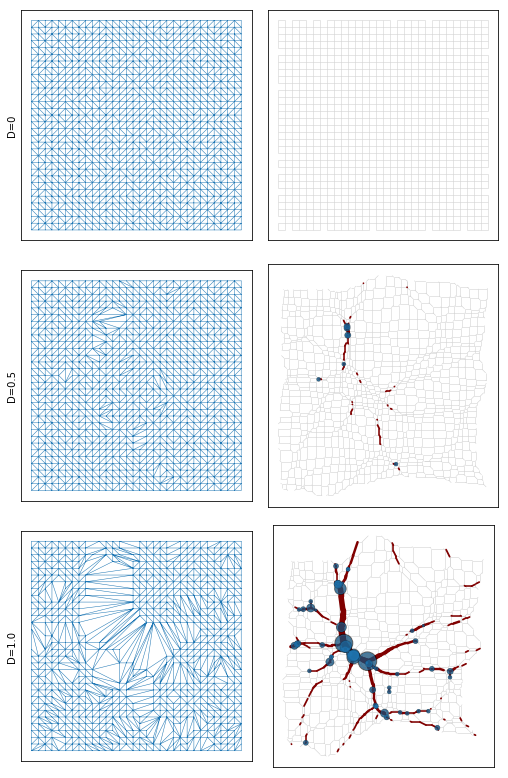

In [7]:
xlim = None #[0, 15]
ylim = None #[-10, 5]

box = cft.Box(dim=2, N=32, L=25.)
P = cft.Power_law(n=-0.75) * cft.Scale(box, 0.5)
delta_0 = cft.garfield(B=box, P=P, seed=44)
delta_0 /= delta_0.std()
pot_0 = np.fft.ifftn(np.fft.fftn(delta_0) * cft.Potential()(box.K)).real

plt.rcParams['figure.figsize'] = (7, 11)
fig, axes = plt.subplots(3, 2) # , sharex=True, sharey=True)
for ax in axes.flat:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
ch, selection, valid = get_convex_hull(box, pot_0, 0.0001)
plot_regular_triangulation(ch, selection, xlim, ylim, ax=axes[0,0])
plot_power_diagram(box, ch, valid, xlim, ylim, ax=axes[0,1], point_scale=20)
ch, selection, valid = get_convex_hull(box, pot_0, 0.75)
plot_regular_triangulation(ch, selection, xlim, ylim, ax=axes[1,0])
plot_power_diagram(box, ch, valid, xlim, ylim, ax=axes[1,1], point_scale=20)
ch, selection, valid = get_convex_hull(box, pot_0, 1.5)
plot_regular_triangulation(ch, selection, xlim, ylim, ax=axes[2,0])
plot_power_diagram(box, ch, valid, xlim, ylim, ax=axes[2,1], point_scale=20)
fig.tight_layout()
axes[0,0].set_ylabel('D=0')
axes[1,0].set_ylabel('D=0.5')
axes[2,0].set_ylabel('D=1.0')
# plt.savefig('time-evolution.pdf', bbox_inches='tight')
plt.show()

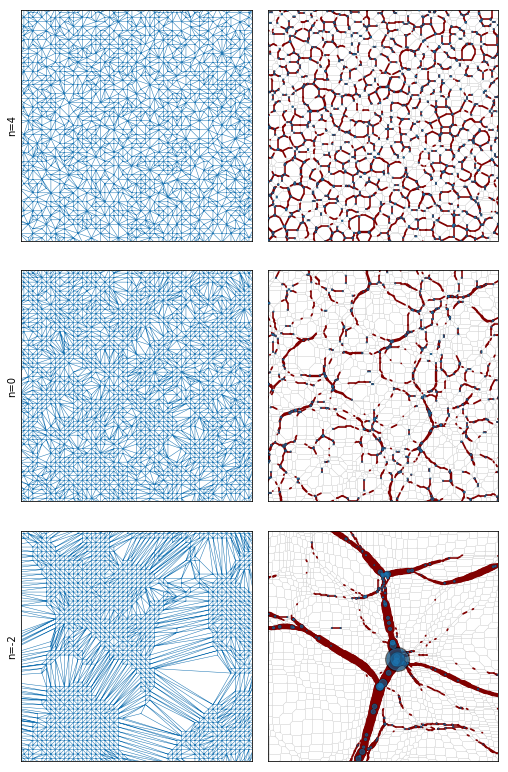

In [9]:
xlim = [-20, 20]
ylim = [-20, 20]

box = cft.Box(dim=2, N=128, L=100.)
seed = 43

plt.rcParams['figure.figsize'] = (7, 11)
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)
for ax in axes.flat:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

P = cft.Power_law(n=4) # * cft.Scale(box, 1.0)
delta_0 = cft.garfield(B=box, P=P, seed=seed)
delta_0 /= delta_0.std()
pot_0 = np.fft.ifftn(np.fft.fftn(delta_0) * cft.Potential()(box.K)).real
ch, selection, valid = get_convex_hull(box, pot_0, 5.0)
plot_regular_triangulation(ch, selection, xlim, ylim, ax=axes[0,0])
plot_power_diagram(box, ch, valid, xlim, ylim, ax=axes[0,1], point_scale=2)

P = cft.Power_law(n=0) # * cft.Scale(box, 1.0)
delta_0 = cft.garfield(B=box, P=P, seed=seed)
delta_0 /= delta_0.std()
pot_0 = np.fft.ifftn(np.fft.fftn(delta_0) * cft.Potential()(box.K)).real
ch, selection, valid = get_convex_hull(box, pot_0, 2.0)
plot_regular_triangulation(ch, selection, xlim, ylim, ax=axes[1,0])
plot_power_diagram(box, ch, valid, xlim, ylim, ax=axes[1,1], point_scale=2)

P = cft.Power_law(n=-2) # * cft.Scale(box, 1.0)
delta_0 = cft.garfield(B=box, P=P, seed=seed)
delta_0 /= delta_0.std()
pot_0 = np.fft.ifftn(np.fft.fftn(delta_0) * cft.Potential()(box.K)).real
ch, selection, valid = get_convex_hull(box, pot_0, 1.5)
plot_regular_triangulation(ch, selection, xlim, ylim, ax=axes[2,0])
plot_power_diagram(box, ch, valid, xlim, ylim, ax=axes[2,1], point_scale=2)
fig.tight_layout()
axes[0,0].set_ylabel('n=4')
axes[1,0].set_ylabel('n=0')
axes[2,0].set_ylabel('n=-2')

# plt.savefig('ps-index-evolution.pdf', bbox_inches='tight')
plt.show()